Example based on https://machinelearningmastery.com/binary-classification-tutorial-with-the-keras-deep-learning-library/
Data: https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)
activity_regularizer: https://machinelearningmastery.com/how-to-reduce-generalization-error-in-deep-neural-networks-with-activity-regularization-in-keras/
http://proceedings.mlr.press/v15/glorot11a.html
https://keras.io/layers/writing-your-own-keras-layers/

In [1]:
import numpy
import pandas

from tensorflow.keras.layers import Dense

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import wvpy.util

from YConditionalRegularizedModel import YConditionalRegularizedModel
from eval_model import eval_model

In [2]:
# load dataset
dataframe = pandas.read_csv("sonar.csv", header=None)

dataframe.shape

(208, 61)

In [3]:
dataframe

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [4]:
# deal with outcome column, which is the last column
last_col = dataframe.shape[1] - 1
Y = numpy.asarray(dataframe[last_col])
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
Y = None

encoded_Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [5]:
X = dataframe.values[:, 0:last_col]  # clean copy, no outcome columns
dataframe = None

X.shape

(208, 60)

In [6]:
def example_model_steps():
    return [
        60, # input vector width
        Dense(60, activation='relu'),
        Dense(1, activation='sigmoid'),
    ]

batch_size = 100

In [7]:
estimators = list()
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', 
                   YConditionalRegularizedModel(
                       example_model_steps, alpha=0.01, 
                       epochs=100, batch_size=batch_size, verbose=0)))
pipeline = Pipeline(estimators)

In [8]:
preds = pipeline.fit_transform(X, encoded_Y)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


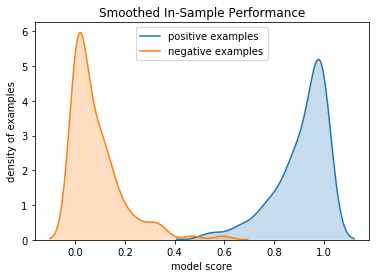

In [9]:
wvpy.util.dual_density_plot(probs=preds[:,1], istrue=encoded_Y, title="Smoothed In-Sample Performance")

In [10]:
preds_out, results = eval_model(model=pipeline, X=X, y=encoded_Y)

In [11]:
print("Smoothed: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Smoothed: 88.91% (3.92%)


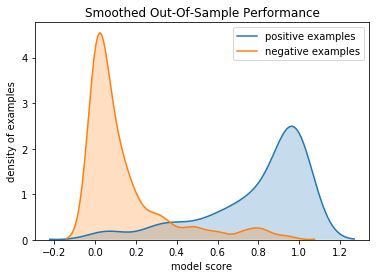

In [12]:
wvpy.util.dual_density_plot(
    probs=preds_out['prediction'], istrue=encoded_Y, 
    title="Smoothed Out-Of-Sample Performance")

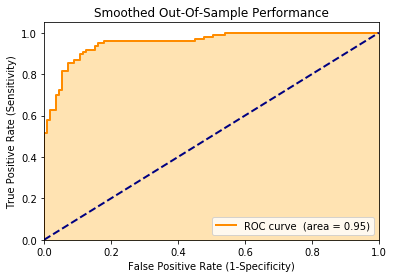

0.9531903037057676

In [13]:
wvpy.util.plot_roc(
    prediction=preds_out['prediction'], istrue=encoded_Y, 
    title="Smoothed Out-Of-Sample Performance")

In [14]:
encoded_Y_shuffled = encoded_Y.copy()
numpy.random.shuffle(encoded_Y_shuffled)

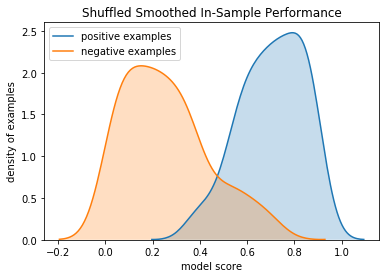

In [15]:
preds_shuffled = pipeline.fit_transform(X, encoded_Y_shuffled)
wvpy.util.dual_density_plot(
    probs=preds_shuffled[:,1], istrue=encoded_Y_shuffled, 
    title="Shuffled Smoothed In-Sample Performance")

In [16]:
preds_out_shuffled, results_shuffled = eval_model(model=pipeline, X=X, y=encoded_Y_shuffled)

In [17]:
print("Shuffled Smoothed: %.2f%% (%.2f%%)" % (results_shuffled.mean()*100, results_shuffled.std()*100))

Shuffled Smoothed: 52.94% (4.54%)


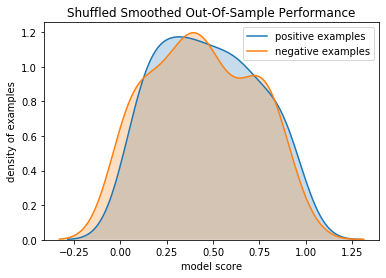

In [18]:
wvpy.util.dual_density_plot(
    probs=preds_out_shuffled['prediction'], istrue=encoded_Y_shuffled, 
    title="Shuffled Smoothed Out-Of-Sample Performance")

In [19]:
pf = pandas.DataFrame({
    'prediction': preds_out['prediction'],
    'truth': encoded_Y
})

In [20]:
estimators0 = list()
estimators0.append(('standardize', StandardScaler()))
estimators0.append(('mlp', 
                    YConditionalRegularizedModel(
                        example_model_steps, alpha=0, 
                        epochs=100, batch_size=batch_size, verbose=0)))
pipeline0 = Pipeline(estimators0)

In [21]:
preds0 = pipeline0.fit_transform(X, encoded_Y)

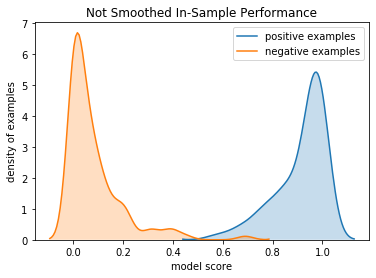

In [22]:
wvpy.util.dual_density_plot(
    probs=preds0[:,1], istrue=encoded_Y, 
    title="Not Smoothed In-Sample Performance")

In [23]:
preds_out0, results0 = eval_model(model=pipeline0, X=X, y=encoded_Y)

In [24]:
print("Not smoothed: %.2f%% (%.2f%%)" % (results0.mean()*100, results0.std()*100))

Not smoothed: 84.17% (5.70%)


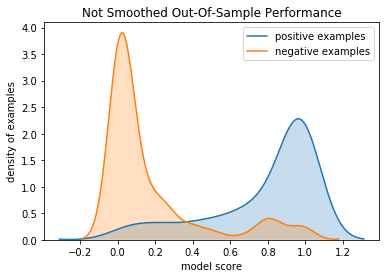

In [25]:
wvpy.util.dual_density_plot(
    probs=preds_out0['prediction'], istrue=encoded_Y, 
    title="Not Smoothed Out-Of-Sample Performance")

In [26]:
preds0s = pipeline0.fit_transform(X, encoded_Y_shuffled)

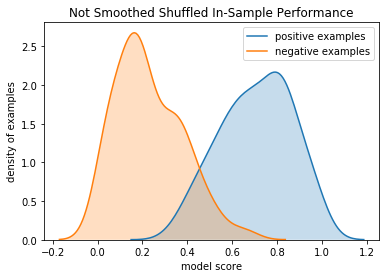

In [27]:
wvpy.util.dual_density_plot(
    probs=preds0s[:,1], istrue=encoded_Y_shuffled, 
    title="Not Smoothed Shuffled In-Sample Performance")

In [28]:
preds_out0s, results0s = eval_model(model=pipeline0, X=X, y=encoded_Y_shuffled)

In [29]:
print("Not smoothed shuffle : %.2f%% (%.2f%%)" % (results0s.mean()*100, results0s.std()*100))

Not smoothed shuffle : 52.43% (4.24%)


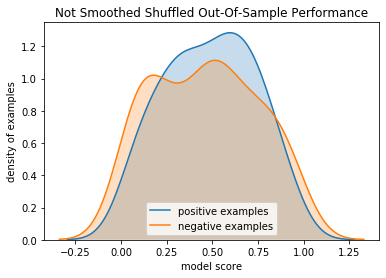

In [30]:
wvpy.util.dual_density_plot(
    probs=preds_out0s['prediction'], istrue=encoded_Y_shuffled, 
    title="Not Smoothed Shuffled Out-Of-Sample Performance")